In [1]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

import os, json
import random
import pandas as pd
from rembg import remove
# from deepface import DeepFace

# import pandas as pd

%matplotlib inline

In [ ]:
# img = cv2.cvtColor(cv2.imread(os.path.join('../RAW_DATA/3d5a815b5f203325df6d4e75cea782db7faeb451.jpeg'), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [ ]:
# img = cv2.resize(img, (128,128))
# plt.imshow(img)

In [ ]:
# data = {
#     'image':"1.jpg",
#     "v":np.ravel(img/255).tolist()
# }

In [ ]:
# data

In [ ]:
# with open('1.json', 'w+') as op:
#     json.dump(data, op)
# op.close()

In [ ]:
# np.astype(img, np.int8)

In [ ]:
# ! pip install matplotlib
# ! pip uninstall jedi -y
# ! pip freeze

In [ ]:
# https://www.pinterest.com/pin/778700591793046882/

In [2]:
class Faces(object):
    
    def __init__(self, face_cascade, face_dir, output_dir,):
        self.face_cascade = face_cascade
        self.image_num = 1
        self.dir_num = 1
        self.face_dir = face_dir
        self.output_dir = output_dir
        self.image_name = 'Face'
        self.error = []
        
    def face_co_ordinates(self, gray):
        return self.face_cascade.detectMultiScale(gray, 1.2, 4)
#         return face_classifier.detectMultiScale(gray, 1.2, 4)
    
    def draw_rectangle(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
        return None
    
    def crop_face(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        return image[y:y+h, x:x+w]
    
    def all_faces(self, draw_face=False):
        images = os.listdir(self.face_dir)
        print(self.dir_num, self.face_dir,'  starts with: ', self.image_num,'  having images:', len(images))
        for image_name in images:
            if image_name[-4:] == '.jpg':
                image = cv2.imread(os.path.join(self.face_dir, image_name))
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                co_ordinates = self.face_co_ordinates(gray)

                if len(co_ordinates) > 0:
                    for co_ordinate in co_ordinates:
                        if draw_face:
                            self.draw_rectangle(image, co_ordinate)
                            cv2.imshow('Sunny', image)
                            cv2.waitKey(500)
                        else:
                            try:
                                crop_image = self.crop_face(image, co_ordinate)
                                name = os.path.join(self.output_dir, self.image_name + str(self.image_num) +'.jpg')
                                cv2.imwrite(name, crop_image)
                                self.image_num += 1
                            except:
                                self.error.append(image_name)
                                continue
        print('No. of errors: ', len(self.error))
        print('====================================================================================================')
        data = {'Errors': self.error}
        df = pd.DataFrame(data)
        img_dir = self.face_dir.replace('./IMAGES/', '')
        err_file = os.path.join(self.output_dir, 'error_'+img_dir[:-1]+'.csv')
        df.to_csv(err_file)
        cv2.destroyAllWindows()
        return None

In [13]:
classifier_path = r'F:\Documents\PROJECT\Face\HAARCASCADE'
classifier = os.listdir(classifier_path)
face_classifier = cv2.CascadeClassifier(os.path.join(classifier_path, classifier[0]))

In [8]:
img_path = r"F:\Documents\PROJECT\ANALYSIS\twitter\VOGUE\Nina_Ricci\Fall_2005_Ready_to_Wear"
imgs = os.listdir(img_path)
imgs

['Detail_Look_1.jpg',
 'Detail_Look_2.jpg',
 'Detail_Look_3.jpg',
 'Detail_Look_4.jpg',
 'Detail_Look_5.jpg',
 'Detail_Look_6.jpg',
 'Detail_Look_7.jpg',
 'Detail_Look_8.jpg',
 'Detail_Look_9.jpg',
 'Look_1.jpg',
 'Look_10.jpg',
 'Look_11.jpg',
 'Look_12.jpg',
 'Look_13.jpg',
 'Look_14.jpg',
 'Look_15.jpg',
 'Look_16.jpg',
 'Look_17.jpg',
 'Look_18.jpg',
 'Look_19.jpg',
 'Look_2.jpg',
 'Look_20.jpg',
 'Look_21.jpg',
 'Look_22.jpg',
 'Look_23.jpg',
 'Look_24.jpg',
 'Look_25.jpg',
 'Look_26.jpg',
 'Look_27.jpg',
 'Look_28.jpg',
 'Look_29.jpg',
 'Look_3.jpg',
 'Look_30.jpg',
 'Look_31.jpg',
 'Look_32.jpg',
 'Look_33.jpg',
 'Look_34.jpg',
 'Look_35.jpg',
 'Look_36.jpg',
 'Look_37.jpg',
 'Look_38.jpg',
 'Look_39.jpg',
 'Look_4.jpg',
 'Look_40.jpg',
 'Look_5.jpg',
 'Look_6.jpg',
 'Look_7.jpg',
 'Look_8.jpg',
 'Look_9.jpg']

In [9]:
# img = cv2.cvtColor(cv2.imread(os.path.join(img_path, imgs[0]), cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img_name = imgs[12]
img = cv2.imread(os.path.join(img_path, img_name), cv2.IMREAD_COLOR)
gray = cv2.imread(os.path.join(img_path, img_name), cv2.IMREAD_GRAYSCALE)

In [10]:
img.shape

(480, 320, 3)

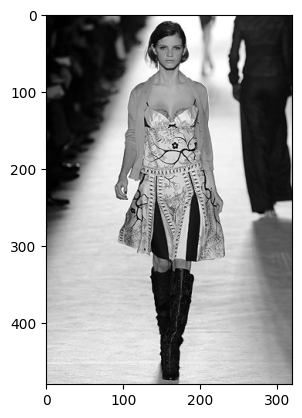

In [11]:
plt.imshow(gray, cmap='gray')

In [14]:
faces_arr = face_classifier.detectMultiScale(gray, 1.2, 4)
faces_arr

array([[138,  27,  45,  45]])

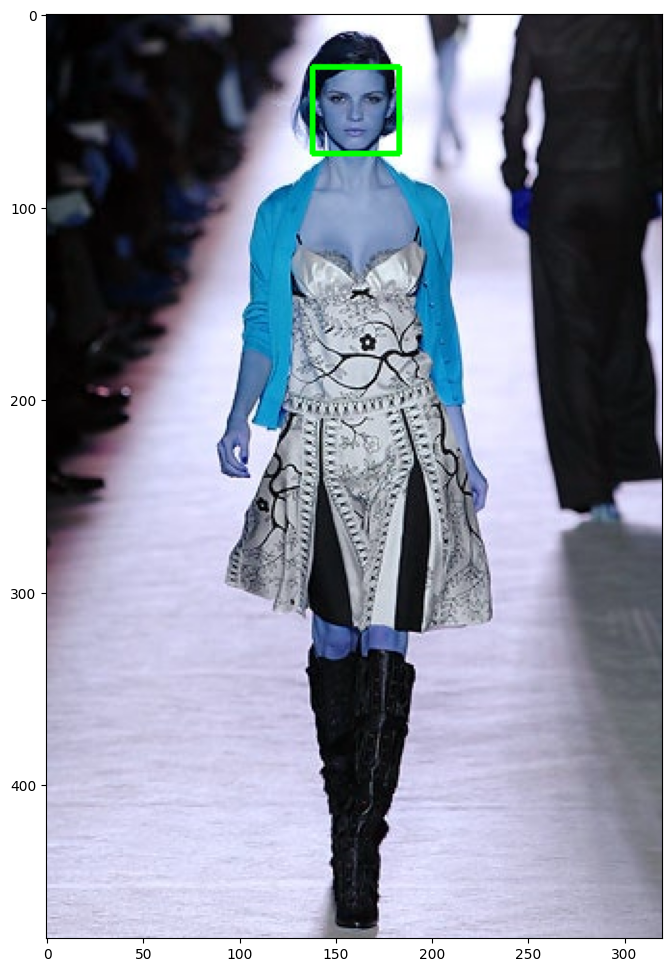

In [16]:
# draw faces

plt.figure(figsize=(12,12))
for i in faces_arr:
    x,y,w,h = i
    plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))

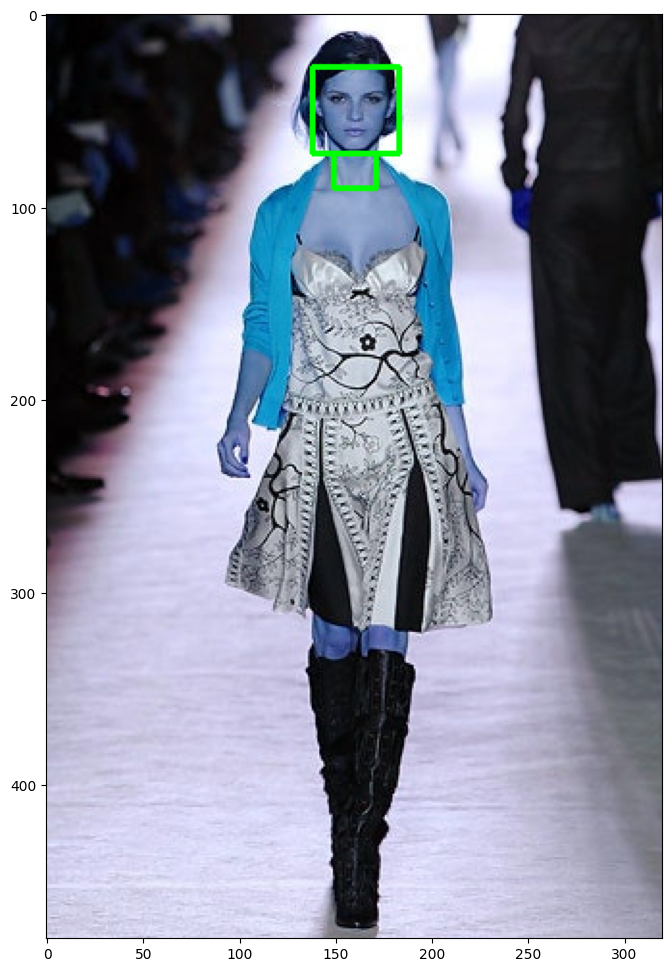

In [17]:
# neck

x,y,w,h = i
neck = np.array([int(x+(w/4)), (y+h), int(w-(w/2)), int(h*0.4)])
x1, y1, w1, h1 = neck

plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))
plt.imshow(cv2.rectangle(img, (x1,y1), (x1+w1, y1+h1), (0,255,0), 2))

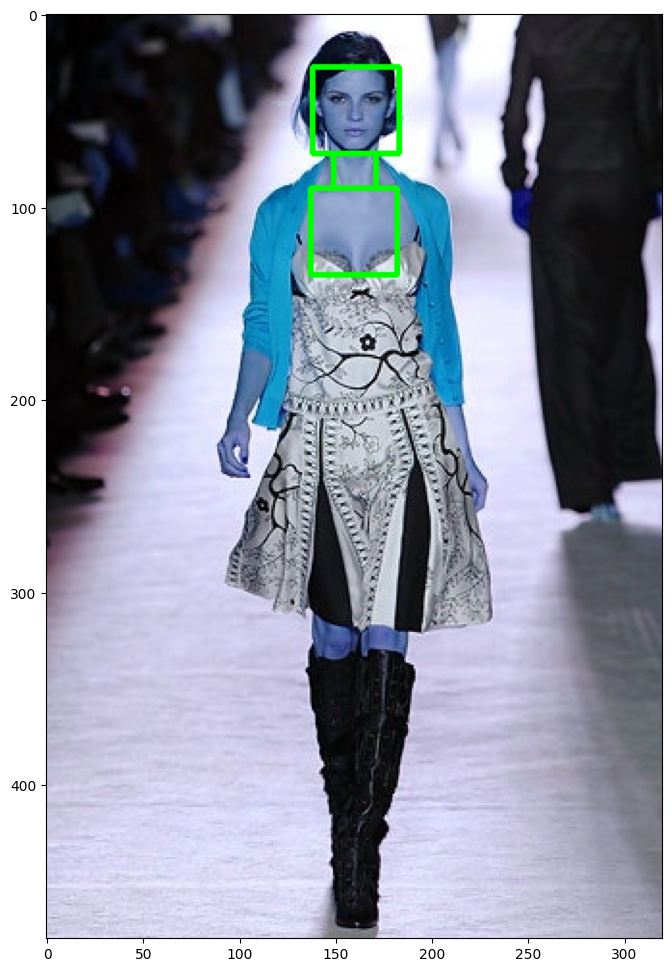

In [18]:
# deep neck

x,y,w,h = i
deep_neck = np.array([int(x1-(w/4)), y1+h1, w, h])
x1_1, y1_1, w1_1, h1_1 = deep_neck

plt.figure(figsize=(12,12))
# plt.imshow(cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2))
plt.imshow(cv2.rectangle(img, (x1_1,y1_1), (x1_1+w, y1_1+h), (0,255,0), 2))

115 90 90 90


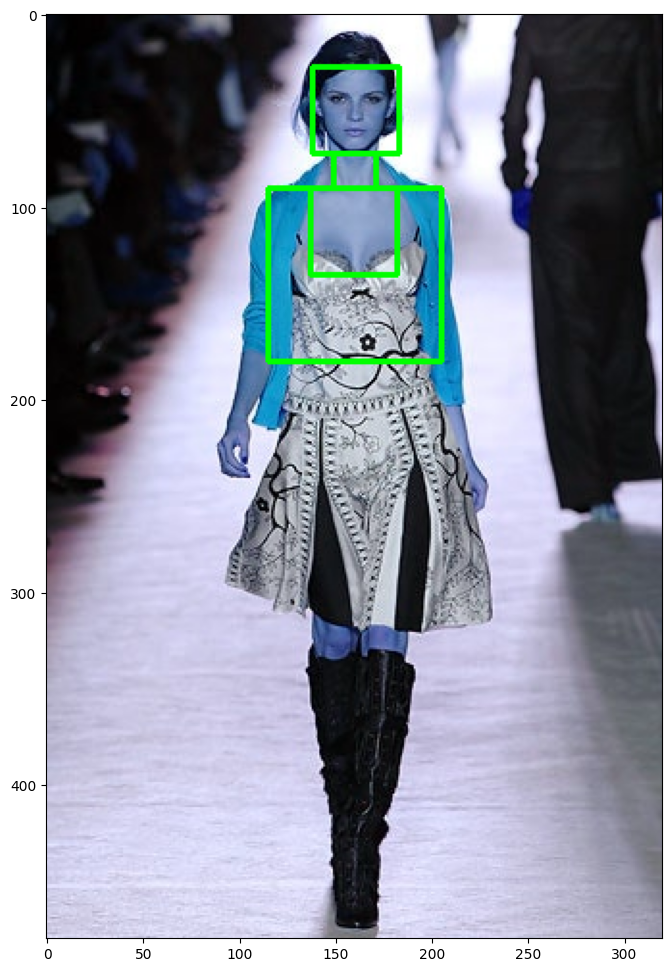

In [19]:
# upper cage 

x2, y2, w2, h2 = np.array([int(x - (w/2)), (y+h+h1), 2*w, 2*h])
print(x2, y2, w2, h2)

plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x2,y2), (x2+w2, y2+h2), (0,255,0), 2))

111 181 92 46


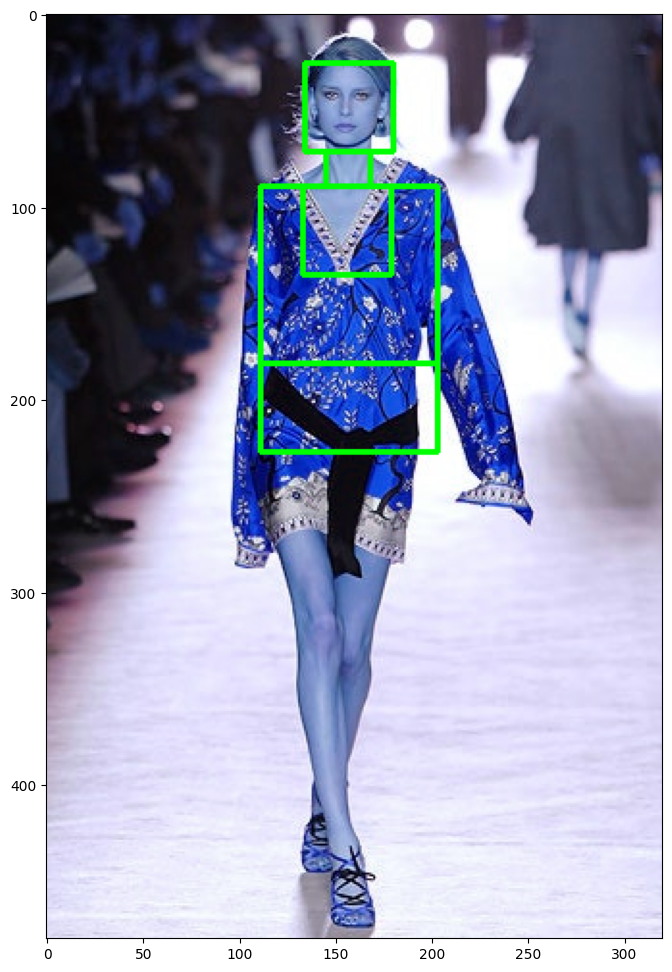

In [49]:
# waist cage

x3, y3, w3, h3 = np.array([x2, y2+h2, w2, h])
print(x3, y3, w3, h3)

plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x3,y3), (x3+w3, y3+h3), (0,255,0), 2))

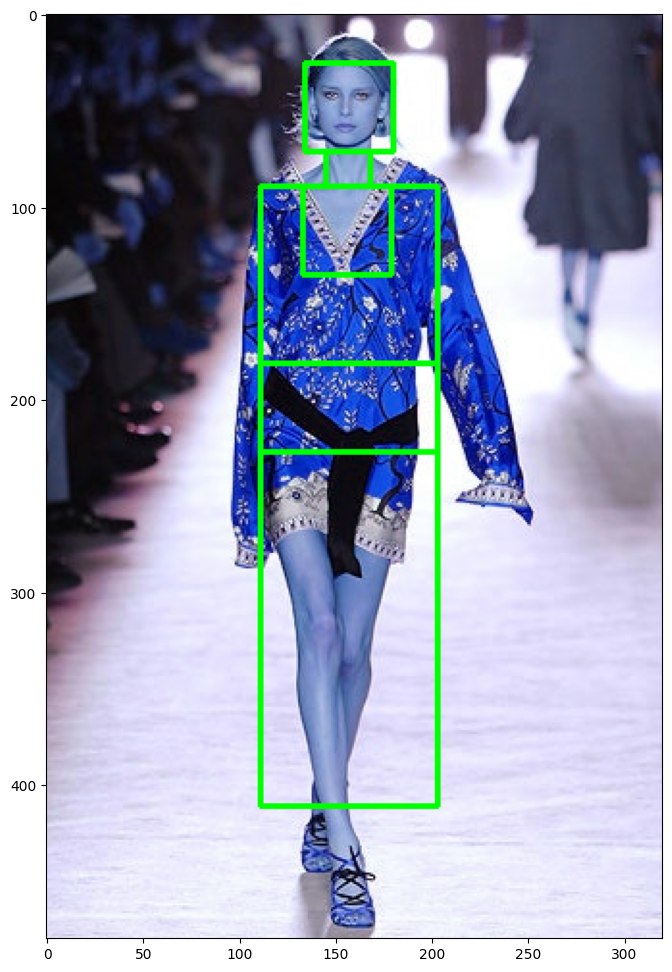

In [50]:
# Lower torso

x4, y4, w4, h4 = np.array([x3, y3+h3, w3, 4*h])
print(x4, y4, w4, h4)

plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x4,y4), (x4+w4, y4+h4), (0,255,0), 2))

111 411 92 23


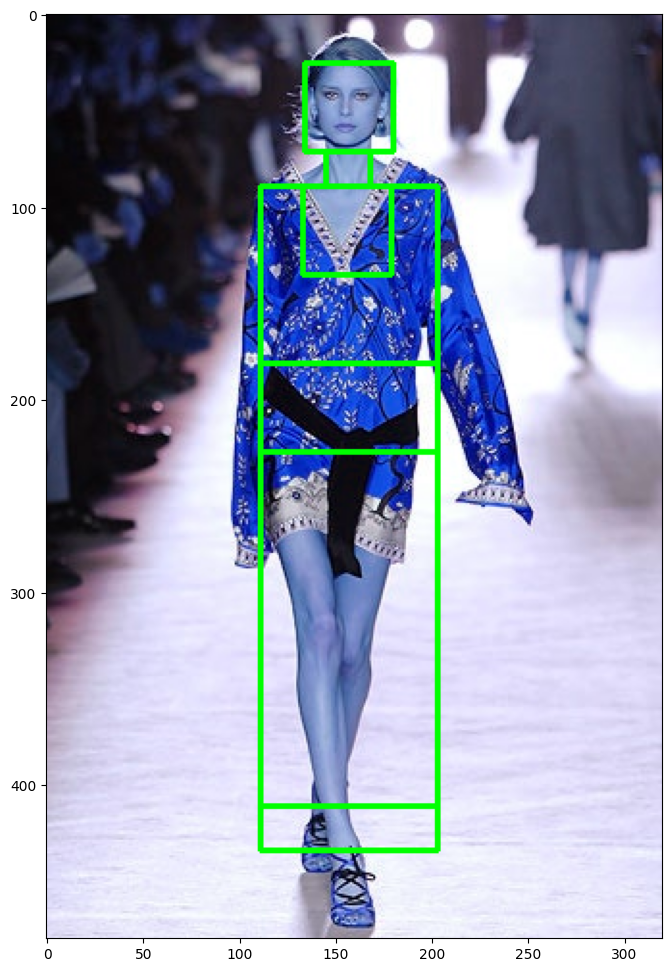

In [51]:
#feet

x5, y5, w5, h5 = np.array([x4, y4+h4, w4, int(h/2)])
print(x5, y5, w5, h5)

plt.figure(figsize=(12,12))
plt.imshow(cv2.rectangle(img, (x5,y5), (x5+w5, y5+h5), (0,255,0), 2))

In [26]:
class HumanModelDetection(object):

    def __init__(self, image):
        self.image = image
        self.h, self.w, _=self.image.shape

    def remove_background(self):
        return remove(self.image)

    @staticmethod
    def find_all_indices(array):
      """
      Finds all indices of the first non-zero value and the first zero value after it.
    
      Args:
          array: A NumPy array of any data type.
    
      Returns:
          A list of tuples, where each tuple contains two elements:
              - The index of the first non-zero value in a segment.
              - The index of the first zero value after the first non-zero value,
                  or -1 if there are no non-zero values in that segment.
      """
      non_zero_starts = []
      non_zero_ends = []
    
      # Iterate through the array, keeping track of the current non-zero segment
      current_start = None
      for i, value in enumerate(array):
        if value != 0:
          if current_start is None:
            current_start = i
        elif current_start is not None:
          non_zero_starts.append(current_start)
          non_zero_ends.append(i)
          current_start = None
    
      # Handle the last segment if it's non-zero
      if current_start is not None:
        non_zero_starts.append(current_start)
        non_zero_ends.append(-1)  # No ending zero for the last segment
    
      return list(zip(non_zero_starts, non_zero_ends))

    @staticmethod
    def modify_array(array, threshold=10):
      """
      Modifies the array by setting elements less than the threshold to 0.
    
      Args:
          array: A NumPy array of any data type.
          threshold: The value below which elements will be set to 0 (default 10).
    
      Returns:
          A new NumPy array with the modified elements.
      """
      return np.where(array < threshold, 0, array)

    @staticmethod
    def get_cordinates(all_indices, intensity_map, x_=True):
        cords = []
        for start, end in all_indices:
            if start == -1:
                print("No non-zero values found in a segment.")
            else:
                # print(f"Segment starting at {start}:")
                if end != -1:
                    # print(f"  - Index of the first non-zero value: {start}")
                    # print(f"  - Index of the first zero value after the first non-zero: {end}")
                    cords += [start, end]
                else:
                    # print(f"  - Index of the first non-zero value: {start}")
                    # print("  - No zero found after the first non-zero value.")
                    cords += [start, intensity_map.shape[0]-3]
        return cords

    @staticmethod
    def binary_gray(img, reduction=10):
        return np.where(img-np.array([reduction]) < 0, 0, 1)
        
    def detect(self, threshold=10):
        no_bg_img = self.remove_background()
        no_bg_gray = cv2.cvtColor(no_bg_img, cv2.COLOR_BGR2GRAY)
        no_bg_gray = self.binary_gray(no_bg_gray)

        # on X axis
        intensity_map = no_bg_gray.sum(axis=0)
        all_indices = self.find_all_indices(self.modify_array(intensity_map, threshold=threshold))
        x_cords = self.get_cordinates(all_indices, intensity_map)

    # on y axis
        intensity_map = no_bg_gray.sum(axis=1)
        all_indices = self.find_all_indices(self.modify_array(intensity_map, threshold=threshold))
        y_cords = self.get_cordinates(all_indices, intensity_map)

        if len(x_cords)==0 or len(y_cords) == 0:
            print('No model detected')
            return None

        return list(zip(x_cords, y_cords))

    @staticmethod
    def draw_bb(img, bb_list, first=True):
        if first:
            cv2.rectangle(img, bb_list[0], bb_list[1], (0, 255,0), 3)
        else:
            cv2.rectangle(img, bb_list[0], bb_list[-1], (0, 255,0), 3)
        return img

In [23]:
img.shape

(3000, 2000, 3)

In [3]:
%matplotlib inline

In [75]:
model_detect = HumanModelDetection(image=img)

img_c = img
bb_boxes = model_detect.detect()
print(bb_boxes)

Segment starting at 89:
  - Index of the first non-zero value: 89
  - Index of the first zero value after the first non-zero: 233
Segment starting at 8:
  - Index of the first non-zero value: 8
  - Index of the first zero value after the first non-zero: 478
[(89, 8), (233, 478)]


In [28]:
Vogue_path = r"F:\Documents\PROJECT\ANALYSIS\twitter\VOGUE"
op_path="./Output"
if not os.path.exists(op_path):
    os.makedirs(op_path)
df_dict = {'img_path':[], 'bb_list':[], 'shape':[]}
n=0
for i in tqdm(range(128)):
    brand = random.choice(os.listdir(Vogue_path))
    brand_path = os.path.join(Vogue_path, brand)
    collection = random.choice(os.listdir(brand_path))
    collection_path = os.path.join(brand_path, collection)
    image_name = random.choice(os.listdir(collection_path))
    image_path = os.path.join(collection_path, image_name)
    # print(image_path)
    
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is not None:
        model_detect = HumanModelDetection(image=img)
        
        bb_list = model_detect.detect()
        img_c = img
        img_c = model_detect.draw_bb(img_c, bb_list)
    
        img_b = img
        img_b = model_detect.draw_bb(img_b, bb_list, first=False)
        
        df_dict['img_path'].append(image_path)
        df_dict['bb_list'].append(str(bb_list))
        df_dict['shape'].append(str(img.shape))
        cv2.imwrite(os.path.join(op_path, f"{n}.jpg"), np.hstack((img_c, img_b)))
        n+=1
        if len(df_dict['img_path']) > 100:
            break

df = pd.DataFrame(df_dict)
df.to_csv("bb_box2.csv")
# plt.imshow(img_c)
# plt.show()

 84%|██████████████████████████████████████████████████████████████████▉             | 107/128 [45:04<08:50, 25.27s/it]


array([[[ 10,   6,  11],
        [ 10,   6,  11],
        [ 10,   6,  11],
        ...,
        [ 82,  73, 106],
        [ 92,  81, 114],
        [ 97,  86, 118]],

       [[ 10,   6,  11],
        [ 10,   6,  11],
        [ 10,   6,  11],
        ...,
        [ 77,  68, 101],
        [ 86,  78, 109],
        [ 92,  84, 115]],

       [[ 10,   7,   9],
        [ 10,   7,   9],
        [  8,   7,   9],
        ...,
        [ 68,  62,  93],
        [ 76,  70, 101],
        [ 82,  76, 107]],

       ...,

       [[218, 213, 244],
        [225, 221, 250],
        [230, 226, 255],
        ...,
        [219, 216, 242],
        [219, 216, 242],
        [220, 217, 243]],

       [[221, 217, 246],
        [223, 220, 246],
        [220, 217, 243],
        ...,
        [236, 233, 255],
        [235, 231, 255],
        [234, 230, 255]],

       [[234, 231, 255],
        [230, 227, 253],
        [224, 221, 247],
        ...,
        [232, 229, 255],
        [231, 227, 255],
        [230, 226, 255]]

In [62]:
# ! pip install --upgrade huggingface_hub
# ! pip install ultralytics
# ! pip install supervision


In [3]:
# load libraries
from huggingface_hub import hf_hub_download
from ultralytics import YOLO
from supervision import Detections
from PIL import Image

In [64]:
# download model
model_path = hf_hub_download(repo_id="arnabdhar/YOLOv8-Face-Detection", filename="model.pt")

model.pt:   0%|          | 0.00/6.25M [00:00<?, ?B/s]

F:\Documents\PROJECT\GARMENTS\CROQUIE_DC\croqDlEnv\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\amit\.cache\huggingface\hub\models--arnabdhar--YOLOv8-Face-Detection. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [66]:
model_path
# 'C:\\Users\\amit\\.cache\\huggingface\\hub\\models--arnabdhar--YOLOv8-Face-Detection\\snapshots\\52fa54977207fa4f021de949b515fb19dcab4488\\model.pt'

'C:\\Users\\amit\\.cache\\huggingface\\hub\\models--arnabdhar--YOLOv8-Face-Detection\\snapshots\\52fa54977207fa4f021de949b515fb19dcab4488\\model.pt'

In [67]:
# load model
model = YOLO(model_path)

In [68]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [69]:
# inference
image_path = os.path.join(img_path, img_name)
output = model(Image.open(image_path))
results = Detections.from_ultralytics(output[0])


0: 640x448 1 FACE, 1713.8ms
Speed: 91.6ms preprocess, 1713.8ms inference, 46.9ms postprocess per image at shape (1, 3, 640, 448)


In [72]:
results.xyxy

array([[      139.1,      24.263,      172.25,       67.78]], dtype=float32)

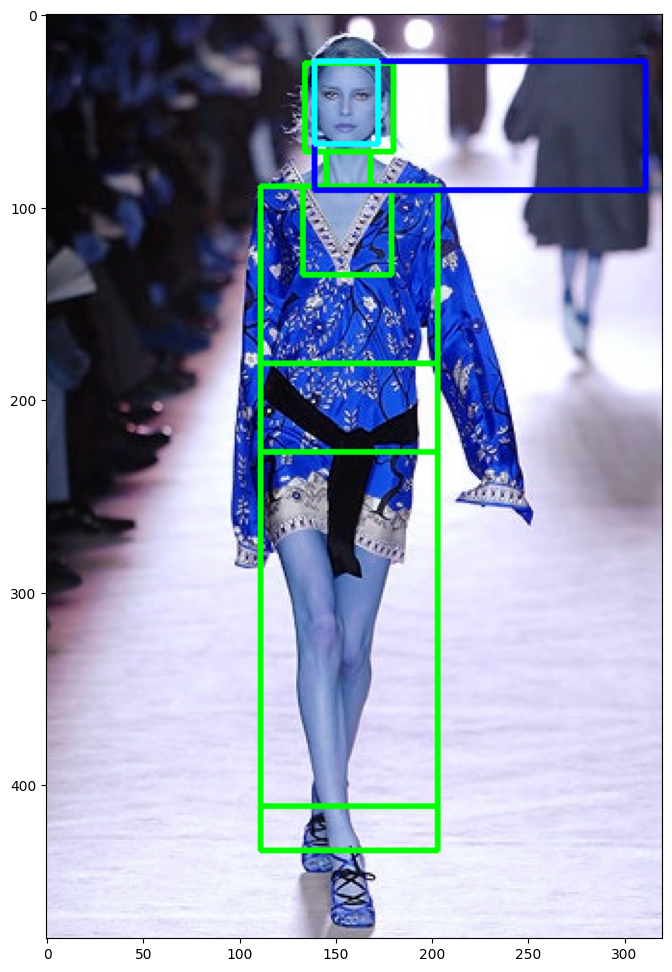

In [75]:
# draw faces

plt.figure(figsize=(12,12))
for i in results.xyxy:
    x,y,w,h = list(map(int, i))
    plt.imshow(cv2.rectangle(img, (x,y), (w, h), (0,255,255), 2))

In [76]:
from huggingface_hub import hf_hub_download 
yolo9_model_path = hf_hub_download("merve/yolov9", filename="yolov9-c.pt", local_dir="./")
print(yolo9_model_path)

yolov9-c.pt:   0%|          | 0.00/103M [00:00<?, ?B/s]

./yolov9-c.pt


In [4]:
import os, sys; sys.path.append(os.path.dirname('./yolov9/'))

In [5]:
import yolov9.inference  as yolo_inf

In [24]:
import torch
import cv2
import numpy as np
from yolov9.models.common import DetectMultiBackend
from yolov9.utils.general import non_max_suppression, scale_boxes
from yolov9.utils.torch_utils import select_device, smart_inference_mode
from yolov9.utils.augmentations import letterbox
import PIL.Image
import supervision as sv

@smart_inference_mode()
def predict(image_path, weights='yolov9-c.pt', imgsz=640, conf_thres=0.1, iou_thres=0.45, device='cpu', data='data/coco.yaml'):
    # Initialize
    # device = select_device(device)
    model = DetectMultiBackend(weights, device=device, fp16=False, data=data)
    stride, names, pt = model.stride, model.names, model.pt

    # Load image
    image = PIL.Image.open(image_path)
    img0 = np.array(image)
    assert img0 is not None, f'Image Not Found {image_path}'
    img = letterbox(img0, imgsz, stride=stride, auto=True)[0]
    img = img[:, :, ::-1].transpose(2, 0, 1)
    img = np.ascontiguousarray(img)
    img = torch.from_numpy(img).to(device).float()
    img /= 255.0
    if img.ndimension() == 3:
        img = img.unsqueeze(0)

    # Init bounding box annotator and label annotator
    bounding_box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator(text_position=sv.Position.CENTER)

    # Inference
    pred = model(img, augment=False, visualize=False)

    # Apply NMS
    pred = non_max_suppression(pred[0][0], conf_thres, iou_thres, classes=None, max_det=1000)

    # Process detections
    for i, det in enumerate(pred):
        if len(det):
            det[:, :4] = scale_boxes(img.shape[2:], det[:, :4], img0.shape).round()
            for *xyxy, conf, cls in reversed(det):
                label = f'{names[int(cls)]} {conf:.2f}'
                # Transform detections to supervisions detections
                detections = sv.Detections(
                    xyxy=torch.stack(xyxy).cpu().numpy().reshape(1, -1),
                    class_id=np.array([int(cls)]),
                    confidence=np.array([float(conf)])
                )
                
                if detections.confidence[0] > 0.9:
                    print(detections)
                    print('-'*50)
                # Labels
                labels = [
                    f"{class_id} {confidence:0.2f}"
                    for class_id, confidence
                    in zip(detections.class_id, detections.confidence)
                ]

                img0 = bounding_box_annotator.annotate(img0, detections)
                img0 = label_annotator.annotate(img0, detections, labels)

    return img0[:, :, ::-1], pred


In [25]:
image_path = os.path.join(img_path, img_name)
                          
op_img, preds = predict(image_path=image_path, weights='yolov9-c.pt', imgsz=640, conf_thres=0.1, iou_thres=0.45)

Fusing layers... 
Model summary: 604 layers, 50880768 parameters, 0 gradients, 237.6 GFLOPs


Detections(xyxy=array([[         95,          10,         254,         477]], dtype=float32), mask=None, confidence=array([    0.94276]), class_id=array([0]), tracker_id=None, data={})
--------------------------------------------------


In [9]:
preds[0]

tensor([[9.50000e+01, 1.00000e+01, 2.54000e+02, 4.77000e+02, 9.42761e-01, 0.00000e+00],
        [2.36000e+02, 0.00000e+00, 3.19000e+02, 1.86000e+02, 8.65267e-01, 0.00000e+00],
        [0.00000e+00, 1.16000e+02, 4.70000e+01, 2.74000e+02, 3.46259e-01, 0.00000e+00],
        [5.90000e+01, 0.00000e+00, 1.25000e+02, 1.37000e+02, 2.75082e-01, 0.00000e+00],
        [2.40000e+01, 4.50000e+01, 8.20000e+01, 2.00000e+02, 2.27893e-01, 0.00000e+00],
        [0.00000e+00, 2.80000e+01, 6.50000e+01, 2.24000e+02, 2.14065e-01, 0.00000e+00],
        [2.04000e+02, 0.00000e+00, 2.31000e+02, 6.90000e+01, 1.03702e-01, 0.00000e+00]])

In [14]:
import PIL.Image

image = PIL.Image.open(image_path)
img0 = np.array(image)

In [15]:
# Process detections
for i, det in enumerate(preds):
    if len(det):
        det[:, :4] = scale_boxes(img.shape[2:], det[:, :4], img0.shape).round()
        for *xyxy, conf, cls in reversed(det):
            label = f'{names[int(cls)]} {conf:.2f}'
            # Transform detections to supervisions detections
            detections = sv.Detections(
                xyxy=torch.stack(xyxy).cpu().numpy().reshape(1, -1),
                class_id=np.array([int(cls)]),
                confidence=np.array([float(conf)])
            )
            print(detections)
            print('-'*50)
            # Labels
            # labels = [
            #     f"{class_id} {confidence:0.2f}"
            #     for class_id, confidence
            #     in zip(detections.class_id, detections.confidence)
            # ]

            # img0 = bounding_box_annotator.annotate(img0, detections)
            # img0 = label_annotator.annotate(img0, detections, labels)

IndexError: tuple index out of range

In [ ]:
class Faces(object):
    
    def __init__(self, face_cascade, face_dir, output_dir,):
        self.face_cascade = face_cascade
        self.image_num = 1
        self.dir_num = 1
        self.face_dir = face_dir
        self.output_dir = output_dir
        self.image_name = 'Face'
        self.error = []
        
    def face_co_ordinates(self, gray):
        return self.face_cascade.detectMultiScale(gray, 1.2, 4)
#         return face_classifier.detectMultiScale(gray, 1.2, 4)
    
    def draw_rectangle(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)
        return None
    
    def crop_face(self, image, co_ordinate):
        x,y,w,h = co_ordinate
        return image[y:y+h, x:x+w]
    
    def all_faces(self, draw_face=False):
        images = os.listdir(self.face_dir)
        print(self.dir_num, self.face_dir,'  starts with: ', self.image_num,'  having images:', len(images))
        for image_name in images:
            if image_name[-4:] == '.jpg':
                image = cv2.imread(os.path.join(self.face_dir, image_name))
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                co_ordinates = self.face_co_ordinates(gray)

                if len(co_ordinates) > 0:
                    for co_ordinate in co_ordinates:
                        if draw_face:
                            self.draw_rectangle(image, co_ordinate)
                            cv2.imshow('Sunny', image)
                            cv2.waitKey(500)
                        else:
                            try:
                                crop_image = self.crop_face(image, co_ordinate)
                                name = os.path.join(self.output_dir, self.image_name + str(self.image_num) +'.jpg')
                                cv2.imwrite(name, crop_image)
                                self.image_num += 1
                            except:
                                self.error.append(image_name)
                                continue
        print('No. of errors: ', len(self.error))
        print('====================================================================================================')
        data = {'Errors': self.error}
        df = pd.DataFrame(data)
        img_dir = self.face_dir.replace('./IMAGES/', '')
        err_file = os.path.join(self.output_dir, 'error_'+img_dir[:-1]+'.csv')
        df.to_csv(err_file)
        cv2.destroyAllWindows()
        return None

In [ ]:
class VideoFace(Faces):
    
    def __init__(self, video_path, face_cascade, face_dir, output_dir):
        Faces.__init__(self, face_cascade, face_dir, output_dir)
        self.video = video_path
        self.video_num = 1
        
    def get_video_face(self, draw_face=False):
        
        cap = cv2.VideoCapture(self.video)
        print(self.video_num, 'Video Running -->', self.video)
        while True:
            success, image = cap.read()
            try:
                image = np.uint8(image)
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            except:
                break
                
            co_ordinates = self.face_co_ordinates(gray)

            if len(co_ordinates) > 0:
                for co_ordinate in co_ordinates:
                    if draw_face:
                        self.draw_rectangle(image, co_ordinate)
                        cv2.imshow('Sunny', image)
                        cv2.waitKey(1)
                    else:
                        try:
                            crop_image = self.crop_face(image, co_ordinate)
                            name = os.path.join(self.output_dir, self.image_name + str(self.image_num) +'.jpg')
                            cv2.imwrite(name, crop_image)
                            self.image_num += 1
                        except:
                            self.error.append(image_name)
                            continue

        cap.release()
        cv2.destroyAllWindows()
        return None

In [ ]:
def get_all_video_faces():
    classifier_path = './HAARCASCADE/'
    classifier = os.listdir(classifier_path)
    face_classifier = cv2.CascadeClassifier(os.path.join(classifier_path, classifier[0]))
    
    images_dir_path = './IMAGES/'
    output_dir = './FACES2/'
    video_dir_path = './MY/VIDEO/'
    image_num = 50000
    dir_num = 1
    vid_num = 1
    images_path = './None'
    
    video_dir = os.listdir(video_dir_path)
    
    for video in video_dir:
        video_path = os.path.join(video_dir_path, video)
        vf = VideoFace(video_path, face_classifier, images_path, output_dir)
        vf.image_num = image_num
        vf.vid_num = vid_num
        vf.get_video_face(draw_face=False)
        
        image_num = vf.image_num
        vid_num += 1
    cv2.destroyAllWindows()
    return None

In [ ]:
# get_all_video_faces()

In [ ]:
path = './'
os.listdir(path)

In [ ]:
def get_all_faces():
    classifier_path = './HAARCASCADE/'
    classifier = os.listdir(classifier_path)
    face_classifier = cv2.CascadeClassifier(os.path.join(classifier_path, classifier[0]))
    
    images_dir_path = './MY/'
    output_dir = './FACES2/'
    image_num = 50000
    dir_num = 1
    
    images_dirs = os.listdir(images_dir_path)
    
    for image_dir in images_dirs:
        images_path = os.path.join(images_dir_path, image_dir)
        fc = Faces(face_classifier, images_path, output_dir)
        fc.image_num = image_num
        fc.dir_num = dir_num
        fc.all_faces()
        image_num = fc.image_num
        dir_num += 1
        

In [ ]:
# get_all_faces()

In [ ]:
final_face_path = './FINAL-FACES/'

In [ ]:
final_face_images = os.listdir(final_face_path)

In [ ]:
imgs_name  = []
imgs_shape = []
for i in final_face_images:
    img = cv2.imread(os.path.join(final_face_path, i))
    imgs_name.append(i)
    imgs_shape.append(img.shape[0])

In [ ]:
plt.plot(np.arange(len(imgs_shape)), sorted(imgs_shape))

In [ ]:
data = {
    'image': imgs_name,
    'shape': imgs_shape,
}

df = pd.DataFrame(data)

In [ ]:
x = np.array(imgs_shape)

In [ ]:
x[x>1000]

In [ ]:
df[df['shape']>1000]

In [ ]:
sunny_img = cv2.imread(os.path.join(sunny_images_path, 'Image99.jpg'))

In [ ]:
for i in sunny_images[51:200]:
    sunny_img = cv2.imread(os.path.join(sunny_images_path, i))
    
    gray = cv2.cvtColor(sunny_img, cv2.COLOR_BGR2GRAY)
    
    faces = face_classifier.detectMultiScale(gray, 1.1, 4)
    
    for (x,y,w,h) in faces:
        cv2.rectangle(sunny_img, (x,y), (x+w, y+h), (0, 255,0), 3)
    cv2.imshow('sunny', sunny_img)
    cv2.waitKey(1500)
cv2.destroyAllWindows()

In [ ]:
sunny_img.shape

In [ ]:
x,y,w,h

In [ ]:
raw = sunny_img[y:y+h, x:x+w]

In [ ]:
plt.imshow(raw)

In [ ]:
plt.imshow(sunny_img)

In [ ]:
p = 'k/l/m/'

In [ ]:
os.path.basename(p)

In [ ]:
plt.imshow(sunny_img)

In [ ]:
gray = cv2.cvtColor(sunny_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
# gray = cv2.flip(gray, 1)

In [ ]:
faces = face_classifier.detectMultiScale(gray, 1.1, 4)

In [ ]:
faces

In [ ]:
img = sunny_img.copy()
# img = cv2.flip(img, 1)
plt.imshow(img)

In [ ]:
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255,0), 3)

In [ ]:
plt.imshow(img)

In [ ]:
raw = img[y:y+h, x:x+w]

# Background Remove

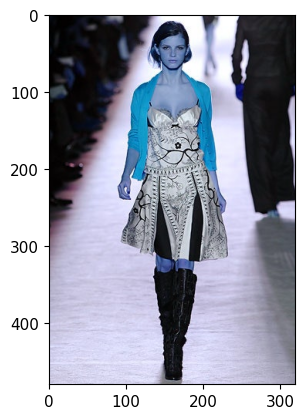

In [62]:
plt.imshow(img)

In [63]:
output = remove(img)

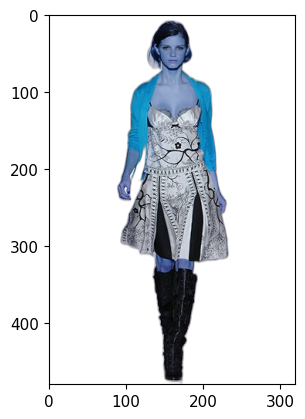

In [64]:
plt.imshow(output)

In [65]:
cv2.imwrite("model.jpg", output)
op_gray = cv2.imread("model.jpg", cv2.IMREAD_GRAYSCALE)

(480, 320)


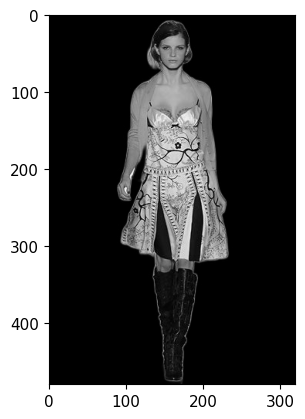

In [66]:
print(op_gray.shape)
plt.imshow(op_gray, cmap='gray')
plt.show()

In [44]:
def contrast(img):
    alpha = 1.5 # Contrast control (1.0-3.0)
    beta = 0 # Brightness control (0-100)
    
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

In [67]:
arr = np.where(op_gray-np.array([10]) < 0, 0, 1)

In [68]:
arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

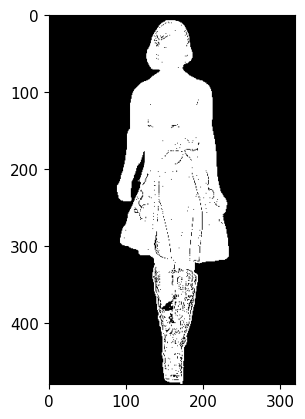

In [69]:
# cont_gray = contrast(op_gray)

plt.imshow(arr, cmap='gray')
plt.show()

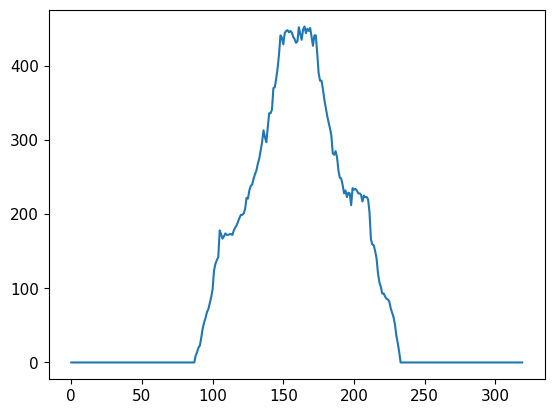

In [70]:
# on x-axis
intensity_map = arr.sum(axis=0)
plt.plot(np.arange(intensity_map.shape[0]), intensity_map)

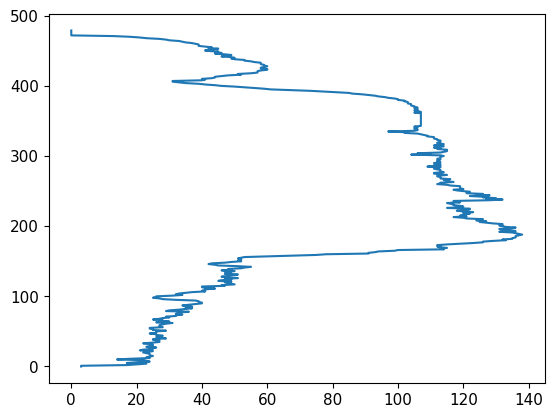

In [72]:
# on y-axis
intensity_map = arr.sum(axis=1)
plt.plot(np.flip(intensity_map), np.arange(intensity_map.shape[0]))

In [35]:
intensity_map 

array([    0,     0,     0,     0,     0,     0,    15,    37,   356,
        1840,  3028,  2795,  2671,  3129,  3178,  3524,  3716,  3827,
        3700,  3743,  3809,  3729,  3670,  4232,  4667,  5115,  5440,
        5664,  5892,  6065,  6232,  6317,  6307,  6338,  6352,  6340,
        6297,  5868,  5479,  5699,  5305,  4993,  5342,  5656,  6076,
        6539,  6655,  6598,  6562,  6465,  6516,  6334,  5904,  6029,
        5833,  5760,  5505,  4833,  4541,  5051,  5216,  5549,  5152,
        4768,  4753,  4418,  4100,  3896,  3958,  3323,  3370,  4061,
        4634,  4781,  4986,  5191,  5439,  5670,  6249,  7159,  6819,
        6806,  7167,  7228,  7375,  7779,  8121,  8617,  8697,  8749,
        8841,  8953,  9029,  8963,  8980,  9115,  9267,  9374,  9599,
        9782,  9792,  9830,  9873,  9968, 10009, 10222, 10241,  9968,
        9441,  8715,  8519,  8341,  8245,  8107,  8014,  8186,  7951,
        8082,  8534,  8872,  8699,  8986,  8210,  8497,  9115,  9147,
        8259,  9235,

In [23]:
import numpy as np

def find_indices(array):
  """
  Finds the index of the first non-zero value and the first zero value after it.

  Args:
      array: A NumPy array of any data type.

  Returns:
      A tuple containing two elements:
          - The index of the first non-zero value in the array.
          - The index of the first zero value after the first non-zero value,
              or -1 if there are no non-zero values.
  """
  # Find the first non-zero index using np.nonzero
  non_zero_indices = np.nonzero(array)[0]

  if not non_zero_indices.size:
    # No non-zero values found
    return -1, -1

  # Get the first non-zero value index
  first_non_zero_index = non_zero_indices[0]

  # Find the next zero index after the first non-zero
  try:
    next_zero_index = np.where(array[first_non_zero_index:] == 0)[0][0] + first_non_zero_index
  except IndexError:
    # No zero found after the first non-zero
    next_zero_index = -1

  return first_non_zero_index, next_zero_index

In [24]:
# Example usage

first_non_zero_index, next_zero_index = find_indices(intensity_map)

if first_non_zero_index == -1:
  print("No non-zero values found in the array.")
else:
  print(f"Index of the first non-zero value: {first_non_zero_index}")
  if next_zero_index != -1:
    print(f"Index of the first zero value after the first non-zero: {next_zero_index}")
  else:
    print("No zero found after the first non-zero value.")


Index of the first non-zero value: 0
Index of the first zero value after the first non-zero: 1


Segment starting at 6:
  - Index of the first non-zero value: 6
  - No zero found after the first non-zero value.


Segment starting at 95:
  - Index of the first non-zero value: 95
  - Index of the first zero value after the first non-zero: 254
Segment starting at 7:
  - Index of the first non-zero value: 7
  - No zero found after the first non-zero value.


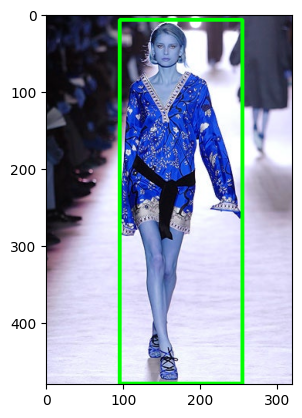

In [62]:
img_c

array([[[ 10,   6,  11],
        [ 10,   6,  11],
        [ 10,   6,  11],
        ...,
        [ 82,  73, 106],
        [ 92,  81, 114],
        [ 97,  86, 118]],

       [[ 10,   6,  11],
        [ 10,   6,  11],
        [ 10,   6,  11],
        ...,
        [ 77,  68, 101],
        [ 86,  78, 109],
        [ 92,  84, 115]],

       [[ 10,   7,   9],
        [ 10,   7,   9],
        [  8,   7,   9],
        ...,
        [ 68,  62,  93],
        [ 76,  70, 101],
        [ 82,  76, 107]],

       ...,

       [[218, 213, 244],
        [225, 221, 250],
        [230, 226, 255],
        ...,
        [219, 216, 242],
        [219, 216, 242],
        [220, 217, 243]],

       [[221, 217, 246],
        [223, 220, 246],
        [220, 217, 243],
        ...,
        [236, 233, 255],
        [235, 231, 255],
        [234, 230, 255]],

       [[234, 231, 255],
        [230, 227, 253],
        [224, 221, 247],
        ...,
        [232, 229, 255],
        [231, 227, 255],
        [230, 226, 255]]